In [1]:
####### Descriptive Analystics and Preproccessing ##############

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets  
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler


from sklearn import tree


In [2]:
###################PART 8##############
'''
We will be using IRIS DATA Set to test drive
1.Decision Tree Classifier and 
2.Naive Bayesian Classifier
3.K-Means Clustering
4.Heirarchical Clustering
5.BPN (Using Keras)


We use the output of the DTC to plot a 
Confusion Matrix

We use accuracy as the parameter to evaluate
the performance of the classifiers.

'''






'\nWe will be using IRIS DATA Set to test drive\nDecision Tree Classifier and \nNaive Bayesian Classifier\n\n\nWe use the output of the DTC to plot a \nConfusion Matrix\n\nWe use accuracy as the parameter to evaluate\nthe performance of the classifiers.\n\n'

In [3]:
iris = datasets.load_iris()  

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=17)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [5]:
clf = tree.DecisionTreeClassifier(random_state=17)
clf = clf.fit(X_train, y_train)

In [6]:
y_pred = clf.predict(X_test)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

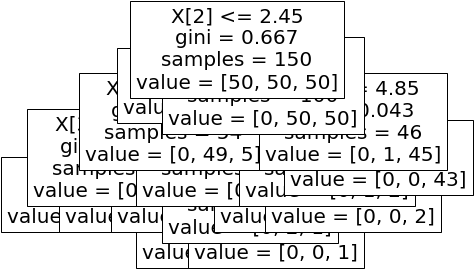

In [7]:
tree.plot_tree(clf.fit(iris.data, iris.target),  fontsize=20)

In [8]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.96      0.93      0.94        27
   virginica       0.89      0.94      0.92        18

    accuracy                           0.95        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.95      0.95      0.95        60



In [9]:
cm = confusion_matrix(y_test, y_pred)

In [10]:
# X_set, y_set = X_test, y_test


In [11]:
# X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop= X_set[:,0].max()+1, step = 0.01),np.arange(start = X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.01))


In [12]:
# plt.contourf(X1,X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap = ListedColormap(("red","green")))

In [13]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

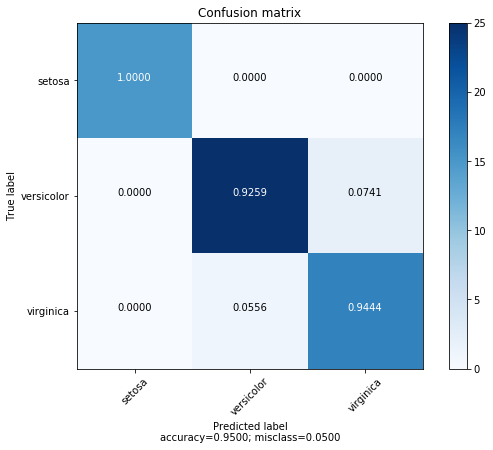

In [14]:
plot_confusion_matrix(cm, ['setosa','versicolor', 'virginica'])

In [ ]:
################### Naive Bayesian using Guassian ###################

In [15]:
from sklearn.naive_bayes import GaussianNB


In [16]:
clf2 = GaussianNB()

In [17]:
clf2.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
pred_clf = clf2.predict(X_test)

#Prediction Probability
prob_pos_clf = clf2.predict_proba(X_test)[:, 1]

In [19]:
#Create the prediction file by concatenation of the original data and predictions
#Reshaping needed to perform the concatenation
pred_clf_df = pd.DataFrame(pred_clf.reshape(60,1))
#Column renaming to indicate the predictions
pred_clf_df.rename(columns={0:'Prediction'}, inplace=True)

In [20]:
#reshaping the test dataset
X_test_df = pd.DataFrame(X_test.reshape(60,4))

#concatenating the two pandas dataframes over the columns to create a prediction dataset
pred_outcome = pd.concat([X_test_df, pred_clf_df], axis=1, join_axes=[X_test_df.index])

pred_outcome.rename(columns = {0:'SepalLengthCm', 1:'SepalWidthCm', 2:'PetalLengthCm', 3:'PetalWidthCm'}, inplace=True)

/home/nitesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  """


In [21]:
# Test options and evaluation metric
scoring = 'accuracy'
pred_outcome.head()


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Prediction
0      -0.506491      1.763528      -1.251767     -0.943766           0
1       0.155749     -0.369772       0.447945      0.434300           1
2       0.928362     -0.156442       0.819757      1.436529           2
3      -0.175371     -0.583102       0.235481      0.183742           1
4       0.376496     -0.583102       0.607293      0.810136           2

In [22]:
kfold = model_selection.KFold(n_splits=10, random_state=7)

#calling the cross validation function
cv_results = model_selection.cross_val_score(GaussianNB(), X_train, y_train, cv=kfold, scoring=scoring)

In [23]:
msg = "%s: %f (%f)" % ('NB accuracy', cv_results.mean(), cv_results.std())
print(msg)


NB accuracy: 0.955556 (0.054433)


In [24]:
# We conclude that since both classfiers give the same accuracy of this test

In [ ]:
### K mean Clustering ##############

In [25]:
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

/home/nitesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


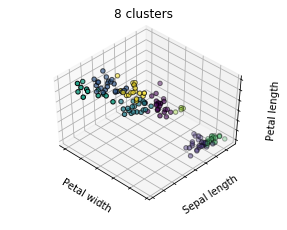

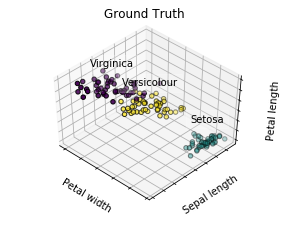

In [26]:
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3))]

fignum = 1
titles = ['8 clusters', '3 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [28]:
########## Hierarchical Clustering #############

In [43]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [53]:
#Hierachy Clustering 
hier=linkage(X,"ward")
max_d=7.08
plt.figure(figsize=(15,10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    hier,
    truncate_mode='lastp',  
    p=30,                  
    leaf_rotation=90.,      
    leaf_font_size=10.,     
)
plt.axhline(y=max_d, c='k')

plt.show()

In [55]:
################# BPN #################

In [54]:
from sklearn.neural_network import MLPClassifier

In [58]:
clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# load dataset
# dataframe = pd.read_csv("iris.data", header=None)
dataframe =  pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
 
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 


In [66]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=50, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)


Baseline: 42.67% (16.38%)


In [67]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
#since epochs are less

Baseline: 42.67% (16.38%)


In [57]:
# ############## INITIALIZING WEIGHTS ##############



# def initialize_parameters(n_x, n_h, n_y):
    
#     np.random.seed(2) # we set up a seed so that our output matches ours although the initialization is random.
    
#     W1 = np.random.randn(n_h, n_x) * 0.01 #weight matrix of shape (n_h, n_x)
#     b1 = np.zeros(shape=(n_h, 1))  #bias vector of shape (n_h, 1)
#     W2 = np.random.randn(n_y, n_h) * 0.01   #weight matrix of shape (n_y, n_h)
#     b2 = np.zeros(shape=(n_y, 1))  #bias vector of shape (n_y, 1)
       
#     #store parameters into a dictionary    
#     parameters = {"W1": W1,
#                   "b1": b1,
#                   "W2": W2,
#                   "b2": b2}
    
#     return parameters
# #Function to define the size of the layer
# def layer_sizes(X, Y):
#     n_x = X.shape[0] # size of input layer
#     n_h = 6# size of hidden layer
#     n_y = Y.shape[0] # size of output layer
#     return (n_x, n_h, n_y)

# ####### FORWARD PASS ############

# def forward_propagation(X, parameters):
# #retrieve intialized parameters from dictionary    
#     W1 = parameters['W1']
#     b1 = parameters['b1']
#     W2 = parameters['W2']
#     b2 = parameters['b2']
    
    
#     # Implement Forward Propagation to calculate A2 (probability)
#     Z1 = np.dot(W1, X) + b1
#     A1 = np.tanh(Z1)  #tanh activation function
#     Z2 = np.dot(W2, A1) + b2
#     A2 = 1/(1+np.exp(-Z2))  #sigmoid activation function
    
#     cache = {"Z1": Z1,
#              "A1": A1,
#              "Z2": Z2,
#              "A2": A2}
    
#     return A2, cache






